## Data Augmentation

In [2]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt


Using TensorFlow backend.


#### 실제 데이터를 다룰 때, 데이터가 Class 별로 균형있게 존재하는 경우는 흔치 않다
#### 또한 Data Set 이 너무 적은 경우에 overfiting 의 문제가 심하고 학습이 제대로 되지 않을 수 있음
#### Data Augmentation 은, 데이터를 부풀리는 Keras application 으로 ImageDataGenerator 를제공

In [3]:
img = load_img('./f16.jpg')

#### 이미지를 arrary 형태로 바꿈 

In [4]:
data = img_to_array(img)

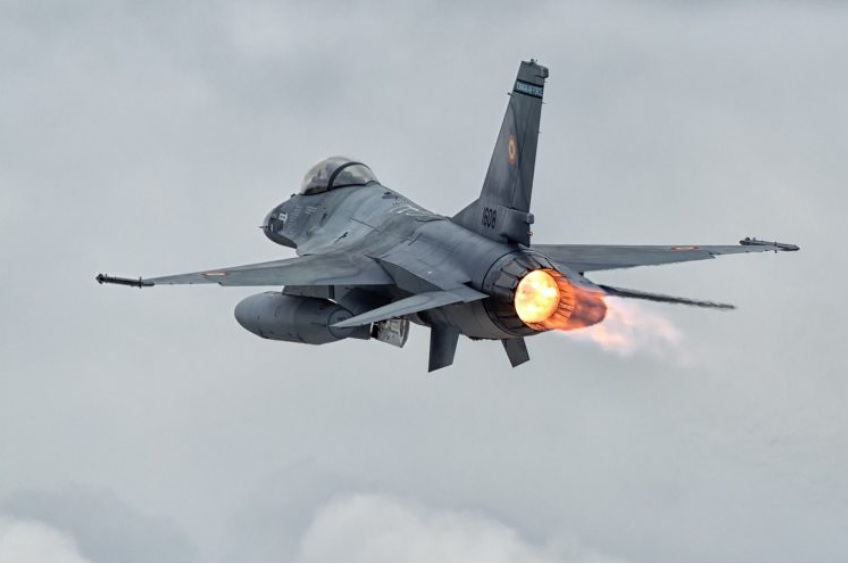

In [5]:
img

#### data = img_to_array(img)를 이용하여 이미지를 array로 바꿈

In [5]:
data

array([[[255., 251., 247.],
        [255., 253., 249.],
        [255., 250., 247.],
        ...,
        [255., 252., 248.],
        [255., 251., 248.],
        [255., 251., 248.]],

       [[204., 186., 172.],
        [205., 187., 173.],
        [203., 184., 170.],
        ...,
        [197., 177., 166.],
        [196., 176., 165.],
        [196., 176., 165.]],

       [[155., 123.,  98.],
        [156., 122.,  97.],
        [152., 118.,  93.],
        ...,
        [146., 110.,  88.],
        [144., 106.,  85.],
        [144., 106.,  85.]],

       ...,

       [[  2.,   2.,   2.],
        [  2.,   2.,   2.],
        [  2.,   2.,   2.],
        ...,
        [ 11.,   3.,   1.],
        [  4.,   2.,   3.],
        [  4.,   2.,   3.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [252., 252., 250.],
        [254., 254., 255.],
        [254., 254., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [46]:
data.shape

(564, 848, 3)

#### shape 를 확인해보니 564x848x3 임
#### 이제 본격적으로 augmentation을 수행

### Horizontal and Vertical Shift Augmentation

#### 이 방법은 말 그대로 이미지를 위, 아래로 움직이는 것
####  width_shift_range: 폭의 범위(왼쪽, 오른쪽)로 움직이는 것

#### 첫번째 차원을 추가하여 확장

In [47]:
samples = expand_dims(data,0)

#### Generator 생성
#### range 를 설정해 얼마나 움직일지 정한다

In [49]:
datagen = ImageDataGenerator(width_shift_range=[-200,200])

#### prepare iterator

In [51]:
it = datagen.flow(samples,batch_size=1)

#### figure 생성

In [52]:
fig = plt.figure(figsize = (30, 30))

<Figure size 2160x2160 with 0 Axes>

### 9개 이미지 생성

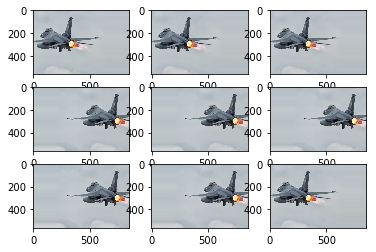

In [57]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = it.next() # generate batch of images
    image = batch[0].astype('uint8') # convert to unsigned integers for viewing
    plt.imshow(image)   #plot raw pixel data
    
#plt.title("\nHorizontal and Vertical Shift Augmentation\n")   # show the figure
plt.show()

####  height_shift_range 
#### 상하 범위로 움직이는 것  height_shift_range = 0.5 이런 식으로 비율을 설정
#### 첫번째 차원을 추가하여 확장

In [58]:
samples = expand_dims(data,0)

#### augment generator 를 사용하여 이미지 데이터를 생성

In [59]:
datagen = ImageDataGenerator(height_shift_range=0.5)

#### iterator 준비

In [60]:
it = datagen.flow(samples, batch_size=1)

#### samples 와 plot 을 생성

In [61]:
fig = plt.figure(figsize = (30,30))

<Figure size 2160x2160 with 0 Axes>

#### 9개의 이미지 생성

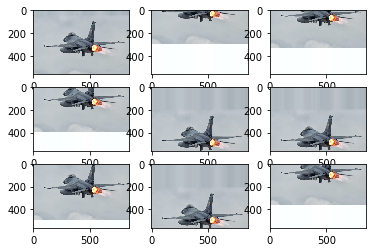

In [62]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = it.next()       # generate batch of images
    image = batch[0].astype('uint8')   # convert to unsigned integers for viewing
    plt.imshow(image)                  # plot raw pixel data
    
plt.show()                  # show the figure

#### Horizontal and Vertical Flip Augmentation 

#### 첫번째 차원을 추가하여 확장 

In [64]:
samples = expand_dims(data,0)

#### 이미지 데이터 확장자를 생성 
#### flip 을 사용하기

In [65]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

####  iterator 준비

In [66]:
it = datagen.flow(samples, batch_size=1)

#### samples 와 plot 을 생성 

In [67]:
fig = plt.figure(figsize = (30, 30))

<Figure size 2160x2160 with 0 Axes>

#### 9개의 이미지 생성

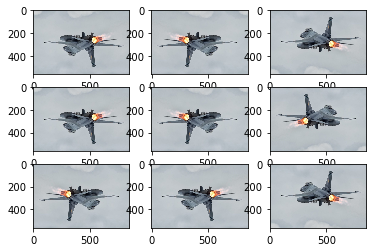

In [70]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

#### Random Rotation Augmentation
#### 이미지를 랜덤한 각도로 회전하는 것

In [25]:
samples = expand_dims(data,0)

In [71]:
datagen = ImageDataGenerator(rotation_range=90)

#### iterator 준비

In [72]:
it = datagen.flow(samples, batch_size=1)

In [73]:
fig = plt.figure(figsize = (30, 30))

<Figure size 2160x2160 with 0 Axes>

#### 이미지 9개 생성

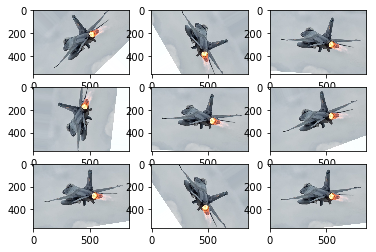

In [74]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()